In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
data_set = pd.read_csv("./data/train.csv")

In [22]:
data_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis(EDA)

In [23]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
data_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
data_set["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

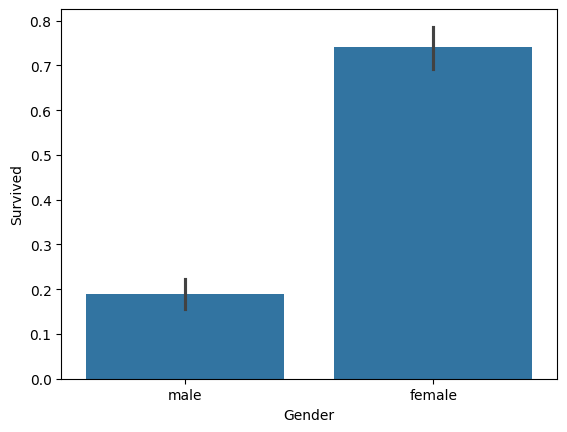

In [26]:
sns.barplot(data=data_set, x = "Sex", y = "Survived")
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.show()

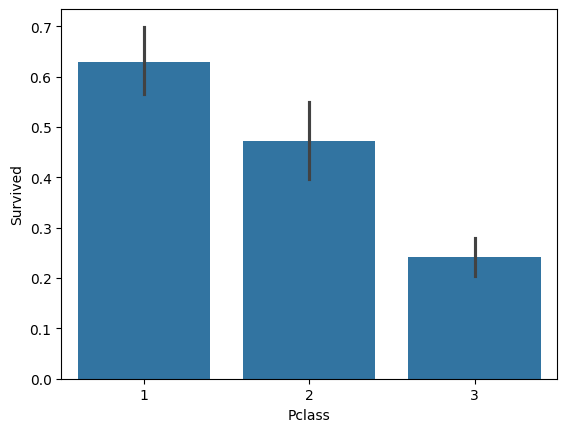

In [27]:
sns.barplot(data=data_set, x = "Pclass", y = "Survived")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()

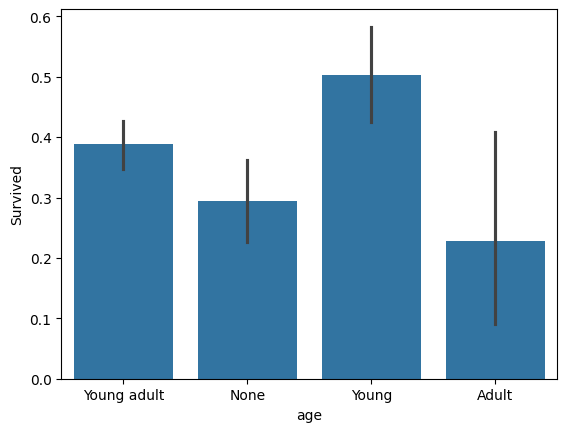

In [28]:
def ageGroup(age):
    if age <= 18:
        return "Young"
    if age <= 60:
        return "Young adult"
    if age > 60:
        return "Adult"
    else:
        return "None"

data_set["agegroup"] = data_set["Age"].apply(ageGroup)

sns.barplot(data=data_set, x = "agegroup", y = "Survived")
plt.xlabel("age")
plt.ylabel("Survived")
plt.show()


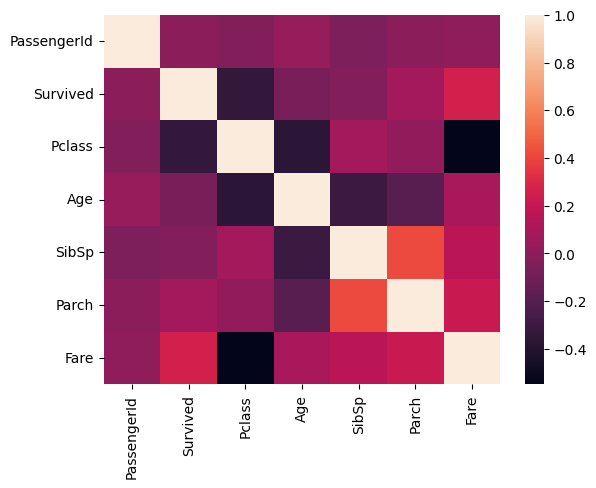

In [29]:
data_set_num = data_set.select_dtypes(include=["number"])
sns.heatmap(data_set_num.corr())
plt.show()

In [30]:
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
agegroup         0
dtype: int64

### Data Preprocessing

In [31]:
# Separating Data and Labels
X = data_set.drop("Survived", axis=1)
y = data_set["Survived"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [33]:
X_train["Age"].fillna(X_train["Age"].mean(), inplace=True)
X_test["Age"].fillna(X_test["Age"].mean(), inplace=True)

C:\Users\tmakh\AppData\Local\Temp\ipykernel_12244\1323470478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train["Age"].fillna(X_train["Age"].mean(), inplace=True)
C:\Users\tmakh\AppData\Local\Temp\ipykernel_12244\1323470478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [34]:
X_train = pd.get_dummies(X_train, columns=["Sex", "Embarked"])
X_test = pd.get_dummies(X_test, columns=["Sex", "Embarked"])

In [35]:
X_train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,agegroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,693,3,"Lam, Mr. Ali",29.807687,0,0,1601,56.4958,NaN,None,False,True,False,False,True
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",29.807687,0,0,239854,0.0000,NaN,None,False,True,False,False,True
527,528,1,"Farthing, Mr. John",29.807687,0,0,PC 17483,221.7792,C95,None,False,True,False,False,True
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",18.000000,0,1,392091,9.3500,NaN,Young,True,False,False,False,True
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",31.000000,1,1,C.A. 31921,26.2500,NaN,Young adult,True,False,False,False,True


In [36]:
X_train = X_train.drop(["Name", "Ticket", "Cabin", "agegroup"], axis=1)
X_test = X_test.drop(["Name", "Ticket", "Cabin", "agegroup"], axis=1)

In [37]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,693,3,29.807687,0,0,56.4958,False,True,False,False,True
481,482,2,29.807687,0,0,0.0000,False,True,False,False,True
527,528,1,29.807687,0,0,221.7792,False,True,False,False,True
855,856,3,18.000000,0,1,9.3500,True,False,False,False,True
801,802,2,31.000000,1,1,26.2500,True,False,False,False,True


In [38]:
X_train["Sex_female"] = X_train["Sex_female"].astype("float64")
X_train["Sex_male"] = X_train["Sex_male"].astype("float64")
X_train["Embarked_C"] = X_train["Embarked_C"].astype("float64")
X_train["Embarked_Q"] = X_train["Embarked_Q"].astype("float64")
X_train["Embarked_S"] = X_train["Embarked_S"].astype("float64")

X_test["Sex_female"] = X_test["Sex_female"].astype("float64")
X_test["Sex_male"] = X_test['Sex_male'].astype("float64")
X_test["Embarked_C"] = X_test["Embarked_C"].astype("float64")
X_test["Embarked_Q"] = X_test["Embarked_Q"].astype("float64")
X_test["Embarked_S"] = X_test["Embarked_S"].astype("float64")

In [39]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
692,693,3,29.807687,0,0,56.4958,0.0,1.0,0.0,0.0,1.0
481,482,2,29.807687,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
527,528,1,29.807687,0,0,221.7792,0.0,1.0,0.0,0.0,1.0
855,856,3,18.000000,0,1,9.3500,1.0,0.0,0.0,0.0,1.0
801,802,2,31.000000,1,1,26.2500,1.0,0.0,0.0,0.0,1.0


In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Age          712 non-null    float64
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   Sex_female   712 non-null    float64
 7   Sex_male     712 non-null    float64
 8   Embarked_C   712 non-null    float64
 9   Embarked_Q   712 non-null    float64
 10  Embarked_S   712 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 66.8 KB


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

Logistic Regression

In [43]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [44]:
y_pred_log = log.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred_log)

0.8044692737430168

In [46]:
precision_score(y_test, y_pred_log)

0.7833333333333333

In [47]:
recall_score(y_test, y_pred_log)

0.6811594202898551

In [48]:
cross_val_log = cross_val_score(log, X_train, y_train, cv=5, scoring="accuracy")

In [49]:
cross_val_log

array([0.79020979, 0.76223776, 0.79577465, 0.81690141, 0.80985915])

In [50]:
cross_val_log.mean()

np.float64(0.7949965527430316)

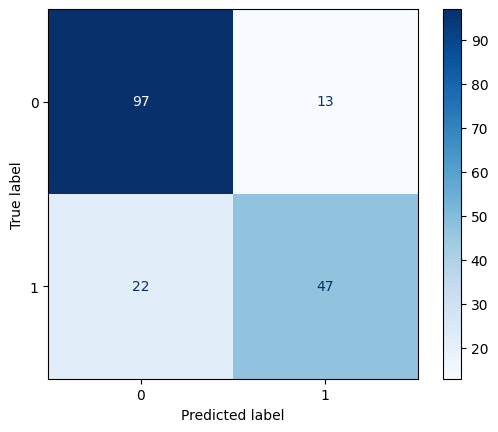

In [51]:
cm_log = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=log.classes_)
disp.plot(cmap="Blues")
plt.show()

Random Forest

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred_rf = rf.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred_rf)

0.7821229050279329

In [55]:
precision_score(y_test, y_pred_rf)

0.7419354838709677

In [56]:
recall_score(y_test, y_pred_rf)

0.6666666666666666

In [57]:
cross_val_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")

In [58]:
cross_val_rf

array([0.78321678, 0.77622378, 0.83098592, 0.83098592, 0.81690141])

In [59]:
cross_val_rf.mean()

np.float64(0.8076627597754358)

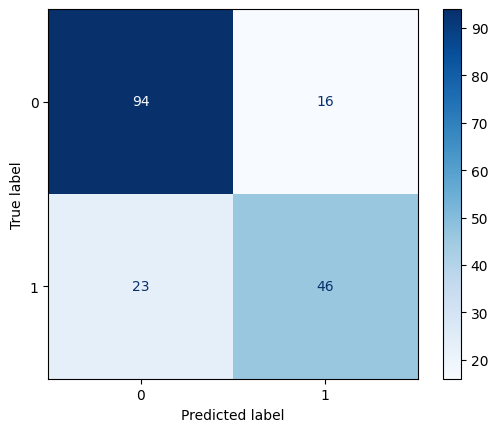

In [60]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.show()

GridSearchCV

In [61]:
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [62]:
best_model_clf = grid_search.best_estimator_

In [63]:
best_model_clf

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=50)

In [64]:
y_pred_clf = best_model_clf.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred_clf)

0.7932960893854749

In [66]:
recall_score(y_test, y_pred_clf)

0.5797101449275363

In [67]:
precision_score(y_test, y_pred_clf)

0.8333333333333334

In [68]:
cross_val_clf = cross_val_score(clf, X_train, y_train, cv= 5, scoring="accuracy")

In [69]:
cross_val_clf

array([0.76923077, 0.79020979, 0.82394366, 0.84507042, 0.80985915])

In [70]:
cross_val_clf.mean()

np.float64(0.807662759775436)

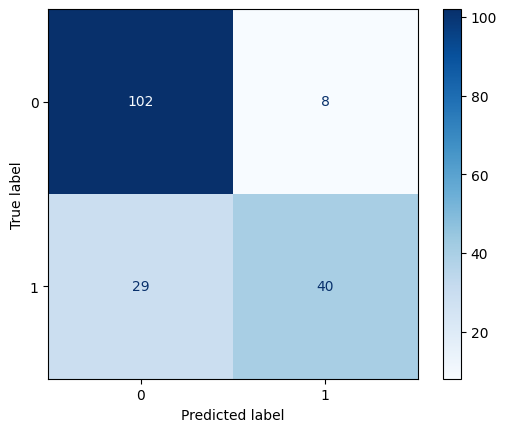

In [71]:
cm_rf = confusion_matrix(y_test, y_pred_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Blues")
plt.show()

In [72]:
final_data = pd.DataFrame({"Models": ["LogReg", "RandFor", "GridS"],
                           "ACC": [accuracy_score(y_test, y_pred_log) * 100,
                                   accuracy_score(y_test, y_pred_rf) * 100,
                                   accuracy_score(y_test, y_pred_clf) * 100,
                           ]})

In [73]:
final_data

,Models,ACC
0,LogReg,80.446927
1,RandFor,78.212291
2,GridS,79.329609


<Axes: xlabel='Models', ylabel='ACC'>

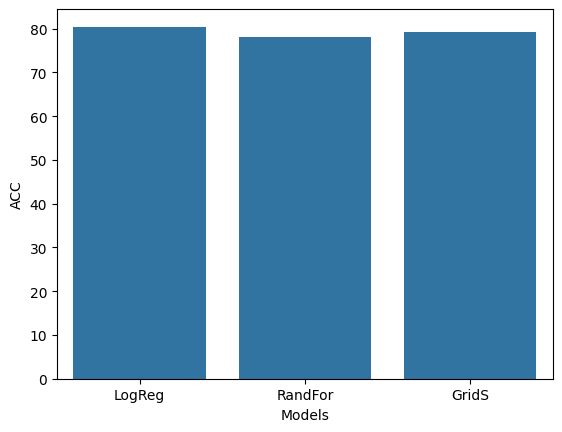

In [74]:
sns.barplot(x="Models", y="ACC", data= final_data)

RandomForest Is the Best Model

In [75]:
test_data_set = pd.read_csv("./data/test.csv")

In [76]:
test_data_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
test_data_set["Age"].fillna(test_data_set["Age"].mean(), inplace=True)
test_data_set = pd.get_dummies(test_data_set, columns=["Sex", "Embarked"])
test_data_set = test_data_set.drop(["Name", "Ticket", "Cabin"], axis=1)
test_data_set["Sex_female"] = test_data_set["Sex_female"].astype("float64")
test_data_set["Sex_male"] = test_data_set["Sex_male"].astype("float64")
test_data_set["Embarked_C"] = test_data_set["Embarked_C"].astype("float64")
test_data_set["Embarked_Q"] = test_data_set["Embarked_Q"].astype("float64")
test_data_set["Embarked_S"] = test_data_set["Embarked_S"].astype("float64")

C:\Users\tmakh\AppData\Local\Temp\ipykernel_12244\707341835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_set["Age"].fillna(test_data_set["Age"].mean(), inplace=True)


In [78]:
test_data_set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [79]:
test_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Sex_female   418 non-null    float64
 7   Sex_male     418 non-null    float64
 8   Embarked_C   418 non-null    float64
 9   Embarked_Q   418 non-null    float64
 10  Embarked_S   418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [80]:
X_final_test = test_data_set
X_final_test = X_final_test.fillna(method="ffill")

C:\Users\tmakh\AppData\Local\Temp\ipykernel_12244\1498614730.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method="ffill")


In [81]:
X_st_final_test = st.fit_transform(X_final_test)

In [82]:
predictions = rf.predict(X_st_final_test)

In [83]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
new_data = pd.DataFrame(test_data_set["PassengerId"])
new_data["Survived"] = predictions

In [85]:
new_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [86]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
